In [7]:
import pandas as pd

In [8]:
wine_df = pd.read_csv("../Data/winequalityN.csv")

In [9]:
wine_df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
wine_df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [11]:
def print_info():
    print("NA VALUES COUNT OF COLUMNS")
    na_value_cols = []
    for c_name in wine_df.columns:
        print(f"{c_name} : {wine_df[c_name].isna().sum()}")
        if(wine_df[c_name].isna().sum()>0):
            na_value_cols.append(c_name)
            wine_df[c_name] = wine_df[c_name].fillna(wine_df.groupby('quality')[c_name].transform('mean'))

In [12]:
print_info()

NA VALUES COUNT OF COLUMNS
type : 0
fixed acidity : 10
volatile acidity : 8
citric acid : 3
residual sugar : 2
chlorides : 2
free sulfur dioxide : 0
total sulfur dioxide : 0
density : 0
pH : 9
sulphates : 4
alcohol : 0
quality : 0


### As we can see we have few columns with null values, we are going to fill this na values with the grouped mean value

In [13]:
wine_df['type'].unique()

array(['white', 'red'], dtype=object)

In [14]:
for c_name in wine_df.columns:
        print(f"{c_name} : {wine_df[c_name].isna().sum()}")

type : 0
fixed acidity : 0
volatile acidity : 0
citric acid : 0
residual sugar : 0
chlorides : 0
free sulfur dioxide : 0
total sulfur dioxide : 0
density : 0
pH : 0
sulphates : 0
alcohol : 0
quality : 0


In [15]:
wine_df.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

### Transforming the object type data ("type") into numeric data

In [16]:
wine_df["type_encoded"] = wine_df.groupby("type")["quality"].transform("mean")

### Till the above point we did cleaning and transformation of the data

In [17]:
X = wine_df.drop(['type','quality'], axis=1)
y = wine_df['quality']

In [18]:
import seaborn as sns

In [19]:
y.unique()

array([6, 5, 7, 8, 4, 3, 9])

<AxesSubplot: >

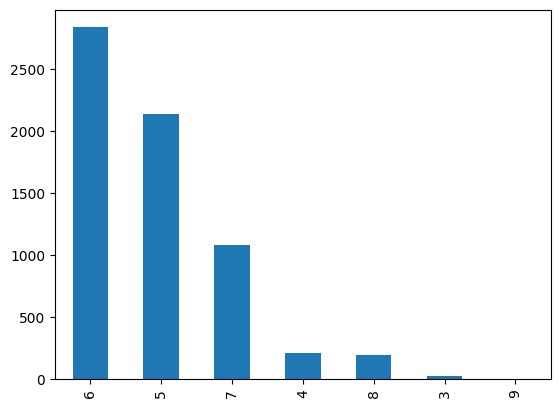

In [20]:
y.value_counts().plot(kind='bar')

### Replacing the low count values with dominating values for reducing prediction complexity and more accuracy

In [21]:
y = y.replace([8,9],7).replace([3,4],5)

<AxesSubplot: >

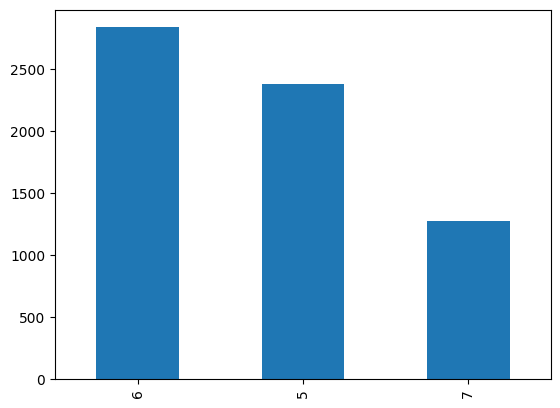

In [22]:
y.value_counts().plot(kind='bar')

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

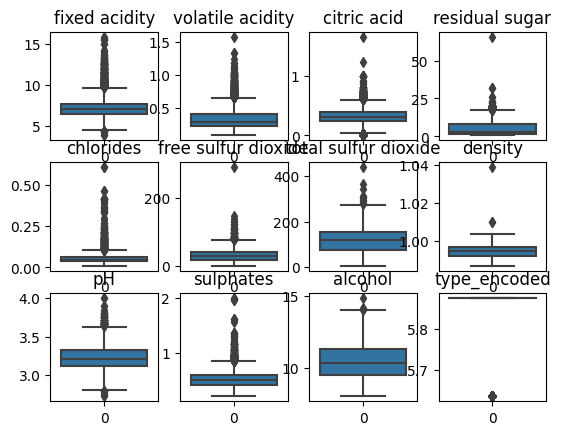

In [18]:
fig,axes = plt.subplots(3,4)
c_names = X.columns
ind = 0
for axx in axes:
    for ax in axx:
        sns.boxplot(X[c_names[ind]], ax=ax)
        ax.set_title(c_names[ind])
        ind+=1

In [24]:
import numpy as np
def treat_outlier(df):
    Q3 = np.quantile(df, 0.75)
    Q1 = np.quantile(df, 0.25)
    IQR = Q3 - Q1
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    df[df>upper_range] = upper_range
    df[df<lower_range] = lower_range
    return df

In [25]:
X_copy = X.copy()
for c_name in X_copy.columns.drop('type_encoded'):
    X_copy[c_name]=treat_outlier(X_copy[c_name])

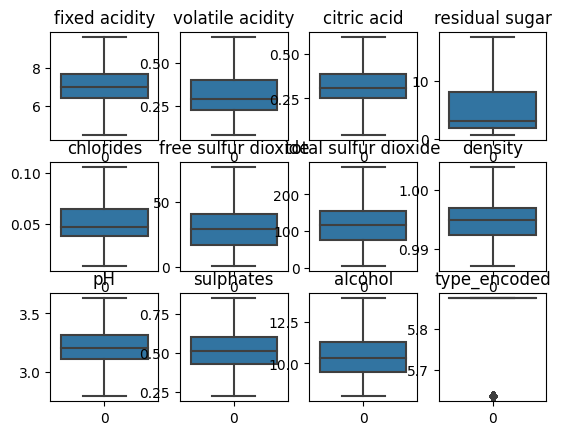

In [26]:
fig,axes = plt.subplots(3,4)
c_names = X_copy.columns
ind = 0
for axx in axes:
    for ax in axx:
        sns.boxplot(X_copy[c_names[ind]], ax=ax)
        ax.set_title(c_names[ind])
        ind+=1

### All sort of preprocessing is done at this moment.

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train , X_test , y_train , y_test = train_test_split(X_copy,y, train_size=0.75)

Applying different Algorithm on our data

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
log_model = LogisticRegression(random_state=10)
log_model.fit(X_train, y_train)

/home/palkeshji/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=10)

In [31]:
predict = log_model.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix, f1_score
from sklearn import metrics

In [33]:
confusion_matrix(y_test, predict)

array([[380, 222,   7],
       [224, 405,  64],
       [ 42, 205,  76]])

In [34]:
from sklearn import metrics

In [35]:
metrics.accuracy_score(y_test, predict)

0.5298461538461539

### Accuracy of the model is quit low, now lets normalize the data and do the above procedure again

In [36]:
from sklearn import preprocessing

In [37]:
X_copy_ = preprocessing.StandardScaler().fit(X_copy).transform(X_copy)

In [38]:
X_copy_ = pd.DataFrame(X_copy_, columns=X.columns.to_list())

### After tranforming or normalizing the data, we will try to predict the data

In [39]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_copy_, y, random_state= 10, test_size= 0.2)

In [40]:
log_model.fit(X_train_, y_train_)

LogisticRegression(random_state=10)

In [41]:
def accuracy_measure(model, flag = 1):
    if(flag == 1):
        predict_ = model.predict(X_test_)
        predict_train = model.predict(X_train_)
        print("Train Data : ",metrics.accuracy_score(y_train_, predict_train))
        print("Train Data : ",metrics.confusion_matrix(y_train_, predict_train))
        print("Test Data : ",metrics.accuracy_score(y_test_, predict_))
        print("Test Data : ",metrics.confusion_matrix(y_test_, predict_))
    else:
        predict_ = model.predict(X_test)
        predict_train = model.predict(X_train)
        print("Test Data : ",metrics.accuracy_score(y_train, predict_train))
        print("Test Data : ",metrics.confusion_matrix(y_train, predict_train))
        print(metrics.accuracy_score(y_test, predict_))
        print(metrics.confusion_matrix(y_test, predict_))


In [42]:
# Logistic Regression Model accuracy
accuracy_measure(log_model)

Train Data :  0.5880315566673081
Train Data :  [[1254  646   21]
 [ 575 1468  226]
 [  70  603  334]]
Test Data :  0.5723076923076923
Test Data :  [[307 150   6]
 [154 360  53]
 [ 25 168  77]]


In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)

In [44]:
accuracy_measure(knn_model,flag=0)

Test Data :  0.639367816091954
Test Data :  [[1187  488  100]
 [ 491 1484  168]
 [ 174  336  444]]
0.5076923076923077
[[338 235  36]
 [220 392  81]
 [ 66 162  95]]


### As we can see the accuracy was worse when working without standardizing the data

In [45]:
knn_model_ = KNeighborsClassifier(n_neighbors= 7).fit(X_train_, y_train_)

In [46]:
accuracy_measure(knn_model_)

Train Data :  0.7115643640561863
Train Data :  [[1463  416   42]
 [ 446 1622  201]
 [  59  335  613]]
Test Data :  0.6069230769230769
Test Data :  [[322 126  15]
 [172 335  60]
 [ 22 116 132]]


### After normalization the accuracy is slighty increased

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dt_model = DecisionTreeClassifier(random_state=10, max_depth= 5, min_samples_leaf=20).fit(X_train_, y_train_)

In [44]:
accuracy_measure(DecisionTreeClassifier(random_state=10, max_depth= 5, min_samples_leaf=20).fit(X_train, y_train,0))

Train Data :  0.3696363286511449
Train Data :  [[1921    0    0]
 [2269    0    0]
 [1007    0    0]]
Test Data :  0.35615384615384615
Test Data :  [[463   0   0]
 [567   0   0]
 [270   0   0]]


In [45]:
accuracy_measure(dt_model)

Train Data :  0.611121801039061
Train Data :  [[1244  650   27]
 [ 523 1587  159]
 [  47  615  345]]
Test Data :  0.5792307692307692
Test Data :  [[295 165   3]
 [151 382  34]
 [ 16 178  76]]


/tmp/ipykernel_8935/1812961980.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(wine_df.corr())


<AxesSubplot: >

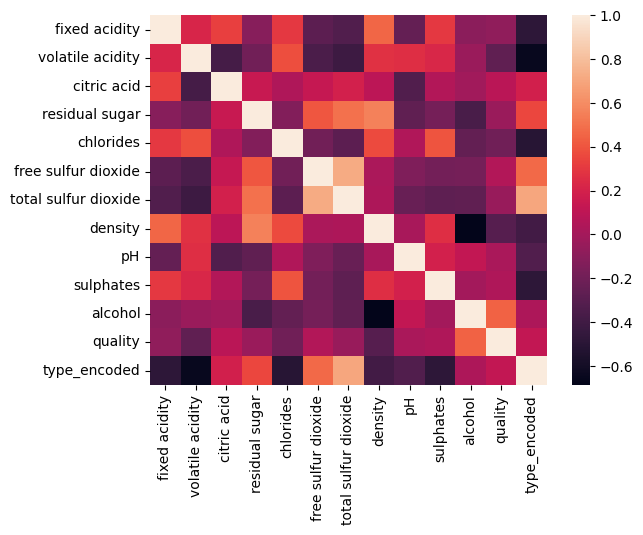

In [46]:
sns.heatmap(wine_df.corr())

In [47]:
wine_df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'type_encoded'],
      dtype='object')

In [48]:
x_temp = X_copy_[['alcohol','density','volatile acidity','type_encoded']]

In [49]:
x_temp_train, x_temp_test , y_temp_train , y_temp_test = train_test_split(x_temp, y, test_size=0.2, random_state=10)

In [50]:
dt_model_temp = DecisionTreeClassifier(random_state=10, max_depth=7).fit(x_temp_train, y_temp_train)

In [51]:
predict_temp = dt_model_temp.predict(x_temp_test)

In [52]:
predict_ = dt_model_temp.predict(x_temp_test)
predict_train = dt_model_temp.predict(x_temp_train)
print("Train Data : ",metrics.accuracy_score(y_temp_train, predict_train))
print("Train Data : ",metrics.confusion_matrix(y_temp_train, predict_train))
print(metrics.accuracy_score(y_temp_test, predict_))
print(metrics.confusion_matrix(y_temp_test, predict_))

Train Data :  0.6292091591302674
Train Data :  [[1287  594   40]
 [ 485 1540  244]
 [  49  515  443]]
0.5784615384615385
[[307 146  10]
 [153 346  68]
 [ 18 153  99]]


In [81]:
def lcm(n1,n2):
    div = 2
    lcm_list = []
    while (n1!=1) or (n2!=1):
        if((n1%div == 0) & (n2%div == 0)):
            n1 = int(n1/div)
            n2 = int(n2/div)
            lcm_list.append(div)
        elif(n1%div == 0):
            n1 = int(n1/div)
            lcm_list.append(div)
        elif(n2%div == 0):
            n2 = int(n2/div)
            lcm_list.append(div)
        else:
            div+=1
    print(lcm_list)
    mul = 1
    for m in lcm_list:
        mul*=m
    print(mul)
        
lcm(3,4)

[2, 2, 3]
12


In [85]:
thislist = ["apple", "banana", "cherry", "orange", "kiwi", "melon", "mango"]
print(thislist[-4::-2])

['orange', 'banana']


In [89]:
thislist = ["apple", "banana", "cherry"]
if "apple" in thislist:
  print("Yes, 'apple' is in the fruits list")

Yes, 'apple' is in the fruits list


In [99]:
thislist.append("mango")

In [97]:
thislist.remove("mango")

In [103]:
thislist

['banana', 'cherry', 'mango', 'm', 'a', 'n', 'g', 'o', 'mango']

In [102]:

del thislist[0]

In [114]:
[f_name for f_name in thislist if(f_name == "mango")]

['mango', 'mango']

In [113]:
# numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# # Using if to filter even numbers
# even_numbers = [x for x in numbers if x % 2 == 0]

# print(even_numbers)


In [132]:
["M" if f_name == "mango" else "B" if f_name=="banana" else "C" for f_name in thislist]

['B', 'C', 'M', 'M']

In [122]:
numbers = [1, 2, 3, 4, 5]

result = ["Even" if num % 2 == 0 else "Odd" if num % 2 != 0 else "Unknown" for num in numbers]

print(result)


['Odd', 'Even', 'Odd', 'Even', 'Odd']


In [125]:
thislist

['banana', 'cherry', 'mango', 'm', 'a', 'n', 'g', 'o', 'mango']

In [131]:
thislist

['banana', 'cherry', 'mango', 'mango']

In [133]:
thislist = ["orange", "mango", "kiwi", "pineapple", "banana"]
thislist.sort()
print(thislist)

['banana', 'kiwi', 'mango', 'orange', 'pineapple']


In [134]:
thislist = [100, 50, 65, 82, 23]
thislist.sort()
print(thislist)

[23, 50, 65, 82, 100]


In [135]:
print(id(thislist))
print(id(thislist.copy()))

140575422003456
140575558066496


In [136]:
thislist2 = thislist
print(id(thislist2))

140575422003456


In [138]:
thislist2[0]=10

In [145]:
thistuple = (1,)

In [146]:
type(thistuple)

tuple

In [148]:
thistuple = ("apple", "banana", "cherry")
y = ("orange","apple")
thistuple += y

print(thistuple)

('apple', 'banana', 'cherry', 'orange', 'apple')


In [158]:
fruits = ("apple", "banana", "cherry", "strawberry", "raspberry")

(green, yellow, *red) = fruits

print(green)
print(yellow)
print(red)

apple
banana
['cherry', 'strawberry', 'raspberry']


In [161]:
thisset = {"apple", "banana", "cherry"}
tropical = {"pineapple", "mango", "papaya"}

thisset.update(tropical)

print(thisset)


{'cherry', 'apple', 'mango', 'banana', 'pineapple', 'papaya'}


In [164]:
thisset = {"apple", "banana", "cherry"}

thisset.discard("abc")

print(thisset)

{'banana', 'cherry', 'apple'}


In [165]:
set1 = {"a", "b" , "c"}
set2 = {1, 2, 3}

set3 = set1.union(set2)
print(set3)

{1, 2, 3, 'a', 'c', 'b'}


In [167]:
set1.update(set2)

In [168]:
set1

{1, 2, 3, 'a', 'b', 'c'}

In [169]:
x = {"apple", "banana", "cherry"}
y = {"google", "microsoft", "apple"}

x.intersection_update(y)

print(x)

{'apple'}


In [170]:
x = {"apple", "banana", "cherry"}
y = {"google", "microsoft", "apple"}

x.symmetric_difference_update(y)

print(x)

{'banana', 'cherry', 'google', 'microsoft'}
